In [1]:
import get_data
import keras_cnn as cnn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
data = get_data.GetData()
day_balance = data.get_day_redeem()
timeseries = np.array(day_balance['total_redeem_amt'])
min_max_scalar = MinMaxScaler()
timeseries = min_max_scalar.fit_transform(timeseries.reshape(-1,1))

D:\workspace\Pycharm\get_data.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  day_redeem['report_date'] = pd.to_datetime(day_redeem['report_date'], format=('%Y%m%d'))
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
window_size = 20
filter_length = 5
nb_filter = 4
timeseries = np.atleast_2d(timeseries)
if timeseries.shape[0] == 1:
    timeseries = timeseries.T  # Convert 1D vectors to 2D column vectors

nb_samples, nb_series = timeseries.shape
# print('\n\nTimeseries ({} samples by {} series):\n'.format(nb_samples, nb_series), timeseries)
model = cnn.make_timeseries_regressor(window_size=window_size, filter_length=filter_length, nb_input_series=nb_series, nb_outputs=nb_series, nb_filter=nb_filter)
# print('\n\nModel with input size {}, output size {}, {} conv filters of length {}'.format(model.input_shape, model.output_shape,                                                                                             nb_filter, filter_length))
model.summary()
X, y, q = cnn.make_timeseries_instances(timeseries, window_size)
# print('\n\nInput features:', X, '\n\nOutput labels:', y, '\n\nQuery vector:', q, sep='\n')
test_size = 30  # In real life you'd want to use 0.2 - 0.5
X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]
history = model.fit(X_train, y_train, nb_epoch=500, batch_size=100, validation_data=(X_test, y_test))


D:\workspace\Pycharm\keras_cnn.py:53: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(20, 1), filters=4, kernel_size=5)`
  input_shape=(window_size, nb_input_series)),
D:\workspace\Pycharm\keras_cnn.py:55: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=4, kernel_size=5)`
  Convolution1D(nb_filter=nb_filter, filter_length=filter_length, activation='relu'),


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 16, 4)             24        
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 8, 4)              0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 4, 4)              84        
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 2, 4)              0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


C:\Users\Administrator\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 377 samples, validate on 30 samples
Epoch 1/500
377/377 [==============================] - 0s 1ms/step - loss: 0.1825 - mean_absolute_error: 0.3412 - val_loss: 0.2487 - val_mean_absolute_error: 0.4755
Epoch 2/500
377/377 [==============================] - 0s 58us/step - loss: 0.1690 - mean_absolute_error: 0.3251 - val_loss: 0.2347 - val_mean_absolute_error: 0.4612
Epoch 3/500
377/377 [==============================] - 0s 79us/step - loss: 0.1589 - mean_absolute_error: 0.3132 - val_loss: 0.2253 - val_mean_absolute_error: 0.4517
Epoch 4/500
377/377 [==============================] - 0s 66us/step - loss: 0.1511 - mean_absolute_error: 0.3038 - val_loss: 0.2177 - val_mean_absolute_error: 0.4438
Epoch 5/500
377/377 [==============================] - 0s 66us/step - loss: 0.1453 - mean_absolute_error: 0.2963 - val_loss: 0.2110 - val_mean_absolute_error: 0.4369
Epoch 6/500
377/377 [==============================] - 0s 69us/step - loss: 0.1406 - mean_absolute_error: 0.2897 - val_loss: 0

377/377 [==============================] - 0s 87us/step - loss: 0.0191 - mean_absolute_error: 0.0969 - val_loss: 0.0241 - val_mean_absolute_error: 0.1229
Epoch 50/500
377/377 [==============================] - 0s 48us/step - loss: 0.0190 - mean_absolute_error: 0.0967 - val_loss: 0.0239 - val_mean_absolute_error: 0.1224
Epoch 51/500
377/377 [==============================] - 0s 48us/step - loss: 0.0189 - mean_absolute_error: 0.0964 - val_loss: 0.0238 - val_mean_absolute_error: 0.1220
Epoch 52/500
377/377 [==============================] - 0s 77us/step - loss: 0.0189 - mean_absolute_error: 0.0960 - val_loss: 0.0236 - val_mean_absolute_error: 0.1216
Epoch 53/500
377/377 [==============================] - 0s 72us/step - loss: 0.0189 - mean_absolute_error: 0.0961 - val_loss: 0.0233 - val_mean_absolute_error: 0.1215
Epoch 54/500
377/377 [==============================] - 0s 82us/step - loss: 0.0188 - mean_absolute_error: 0.0958 - val_loss: 0.0232 - val_mean_absolute_error: 0.1209
Epoch 55/50

377/377 [==============================] - ETA: 0s - loss: 0.0148 - mean_absolute_error: 0.087 - 0s 61us/step - loss: 0.0168 - mean_absolute_error: 0.0904 - val_loss: 0.0193 - val_mean_absolute_error: 0.1081
Epoch 99/500
377/377 [==============================] - 0s 58us/step - loss: 0.0167 - mean_absolute_error: 0.0902 - val_loss: 0.0191 - val_mean_absolute_error: 0.1079
Epoch 100/500
377/377 [==============================] - 0s 50us/step - loss: 0.0167 - mean_absolute_error: 0.0904 - val_loss: 0.0190 - val_mean_absolute_error: 0.1078
Epoch 101/500
377/377 [==============================] - 0s 56us/step - loss: 0.0166 - mean_absolute_error: 0.0906 - val_loss: 0.0189 - val_mean_absolute_error: 0.1077
Epoch 102/500
377/377 [==============================] - 0s 77us/step - loss: 0.0166 - mean_absolute_error: 0.0906 - val_loss: 0.0189 - val_mean_absolute_error: 0.1077
Epoch 103/500
377/377 [==============================] - 0s 69us/step - loss: 0.0166 - mean_absolute_error: 0.0905 - val_

377/377 [==============================] - 0s 58us/step - loss: 0.0155 - mean_absolute_error: 0.0883 - val_loss: 0.0169 - val_mean_absolute_error: 0.1012
Epoch 147/500
377/377 [==============================] - 0s 50us/step - loss: 0.0155 - mean_absolute_error: 0.0882 - val_loss: 0.0168 - val_mean_absolute_error: 0.1014
Epoch 148/500
377/377 [==============================] - 0s 82us/step - loss: 0.0155 - mean_absolute_error: 0.0882 - val_loss: 0.0168 - val_mean_absolute_error: 0.1010
Epoch 149/500
377/377 [==============================] - 0s 66us/step - loss: 0.0155 - mean_absolute_error: 0.0882 - val_loss: 0.0168 - val_mean_absolute_error: 0.1015
Epoch 150/500
377/377 [==============================] - 0s 53us/step - loss: 0.0154 - mean_absolute_error: 0.0881 - val_loss: 0.0168 - val_mean_absolute_error: 0.1013
Epoch 151/500
377/377 [==============================] - 0s 61us/step - loss: 0.0155 - mean_absolute_error: 0.0882 - val_loss: 0.0168 - val_mean_absolute_error: 0.1016
Epoch 

377/377 [==============================] - 0s 61us/step - loss: 0.0147 - mean_absolute_error: 0.0862 - val_loss: 0.0158 - val_mean_absolute_error: 0.0981
Epoch 195/500
377/377 [==============================] - 0s 53us/step - loss: 0.0146 - mean_absolute_error: 0.0861 - val_loss: 0.0158 - val_mean_absolute_error: 0.0983
Epoch 196/500
377/377 [==============================] - 0s 72us/step - loss: 0.0146 - mean_absolute_error: 0.0861 - val_loss: 0.0159 - val_mean_absolute_error: 0.0985
Epoch 197/500
377/377 [==============================] - 0s 61us/step - loss: 0.0146 - mean_absolute_error: 0.0860 - val_loss: 0.0159 - val_mean_absolute_error: 0.0974
Epoch 198/500
377/377 [==============================] - 0s 50us/step - loss: 0.0146 - mean_absolute_error: 0.0857 - val_loss: 0.0158 - val_mean_absolute_error: 0.0974
Epoch 199/500
377/377 [==============================] - 0s 74us/step - loss: 0.0146 - mean_absolute_error: 0.0857 - val_loss: 0.0157 - val_mean_absolute_error: 0.0967
Epoch 

377/377 [==============================] - 0s 74us/step - loss: 0.0140 - mean_absolute_error: 0.0839 - val_loss: 0.0149 - val_mean_absolute_error: 0.0929
Epoch 243/500
377/377 [==============================] - 0s 53us/step - loss: 0.0140 - mean_absolute_error: 0.0841 - val_loss: 0.0149 - val_mean_absolute_error: 0.0933
Epoch 244/500
377/377 [==============================] - 0s 35us/step - loss: 0.0140 - mean_absolute_error: 0.0842 - val_loss: 0.0148 - val_mean_absolute_error: 0.0931
Epoch 245/500
377/377 [==============================] - 0s 41us/step - loss: 0.0140 - mean_absolute_error: 0.0841 - val_loss: 0.0147 - val_mean_absolute_error: 0.0921
Epoch 246/500
377/377 [==============================] - 0s 41us/step - loss: 0.0140 - mean_absolute_error: 0.0842 - val_loss: 0.0147 - val_mean_absolute_error: 0.0931
Epoch 247/500
377/377 [==============================] - 0s 83us/step - loss: 0.0140 - mean_absolute_error: 0.0843 - val_loss: 0.0148 - val_mean_absolute_error: 0.0936
Epoch 

Epoch 291/500
377/377 [==============================] - 0s 74us/step - loss: 0.0136 - mean_absolute_error: 0.0827 - val_loss: 0.0144 - val_mean_absolute_error: 0.0912
Epoch 292/500
377/377 [==============================] - 0s 74us/step - loss: 0.0136 - mean_absolute_error: 0.0834 - val_loss: 0.0143 - val_mean_absolute_error: 0.0913
Epoch 293/500
377/377 [==============================] - 0s 66us/step - loss: 0.0136 - mean_absolute_error: 0.0836 - val_loss: 0.0142 - val_mean_absolute_error: 0.0908
Epoch 294/500
377/377 [==============================] - 0s 69us/step - loss: 0.0135 - mean_absolute_error: 0.0831 - val_loss: 0.0142 - val_mean_absolute_error: 0.0894
Epoch 295/500
377/377 [==============================] - 0s 69us/step - loss: 0.0136 - mean_absolute_error: 0.0826 - val_loss: 0.0143 - val_mean_absolute_error: 0.0890
Epoch 296/500
377/377 [==============================] - 0s 64us/step - loss: 0.0136 - mean_absolute_error: 0.0826 - val_loss: 0.0143 - val_mean_absolute_error:

Epoch 340/500
377/377 [==============================] - 0s 53us/step - loss: 0.0131 - mean_absolute_error: 0.0817 - val_loss: 0.0136 - val_mean_absolute_error: 0.0872
Epoch 341/500
377/377 [==============================] - 0s 50us/step - loss: 0.0131 - mean_absolute_error: 0.0814 - val_loss: 0.0137 - val_mean_absolute_error: 0.0871
Epoch 342/500
377/377 [==============================] - 0s 48us/step - loss: 0.0131 - mean_absolute_error: 0.0812 - val_loss: 0.0138 - val_mean_absolute_error: 0.0873
Epoch 343/500
377/377 [==============================] - 0s 50us/step - loss: 0.0131 - mean_absolute_error: 0.0812 - val_loss: 0.0138 - val_mean_absolute_error: 0.0870
Epoch 344/500
377/377 [==============================] - 0s 48us/step - loss: 0.0131 - mean_absolute_error: 0.0816 - val_loss: 0.0139 - val_mean_absolute_error: 0.0878
Epoch 345/500
377/377 [==============================] - 0s 50us/step - loss: 0.0132 - mean_absolute_error: 0.0815 - val_loss: 0.0138 - val_mean_absolute_error:

377/377 [==============================] - 0s 72us/step - loss: 0.0127 - mean_absolute_error: 0.0803 - val_loss: 0.0136 - val_mean_absolute_error: 0.0856
Epoch 389/500
377/377 [==============================] - 0s 82us/step - loss: 0.0127 - mean_absolute_error: 0.0800 - val_loss: 0.0136 - val_mean_absolute_error: 0.0859
Epoch 390/500
377/377 [==============================] - 0s 90us/step - loss: 0.0127 - mean_absolute_error: 0.0801 - val_loss: 0.0136 - val_mean_absolute_error: 0.0860
Epoch 391/500
377/377 [==============================] - 0s 90us/step - loss: 0.0127 - mean_absolute_error: 0.0803 - val_loss: 0.0135 - val_mean_absolute_error: 0.0858
Epoch 392/500
377/377 [==============================] - 0s 101us/step - loss: 0.0127 - mean_absolute_error: 0.0802 - val_loss: 0.0135 - val_mean_absolute_error: 0.0857
Epoch 393/500
377/377 [==============================] - 0s 93us/step - loss: 0.0127 - mean_absolute_error: 0.0802 - val_loss: 0.0135 - val_mean_absolute_error: 0.0857
Epoch

377/377 [==============================] - 0s 114us/step - loss: 0.0124 - mean_absolute_error: 0.0799 - val_loss: 0.0136 - val_mean_absolute_error: 0.0862
Epoch 437/500
377/377 [==============================] - 0s 66us/step - loss: 0.0124 - mean_absolute_error: 0.0800 - val_loss: 0.0136 - val_mean_absolute_error: 0.0858
Epoch 438/500
377/377 [==============================] - 0s 69us/step - loss: 0.0124 - mean_absolute_error: 0.0790 - val_loss: 0.0137 - val_mean_absolute_error: 0.0862
Epoch 439/500
377/377 [==============================] - 0s 69us/step - loss: 0.0124 - mean_absolute_error: 0.0789 - val_loss: 0.0137 - val_mean_absolute_error: 0.0860
Epoch 440/500
377/377 [==============================] - 0s 77us/step - loss: 0.0124 - mean_absolute_error: 0.0793 - val_loss: 0.0137 - val_mean_absolute_error: 0.0862
Epoch 441/500
377/377 [==============================] - 0s 74us/step - loss: 0.0124 - mean_absolute_error: 0.0795 - val_loss: 0.0137 - val_mean_absolute_error: 0.0861
Epoch

Epoch 485/500
377/377 [==============================] - 0s 66us/step - loss: 0.0122 - mean_absolute_error: 0.0786 - val_loss: 0.0137 - val_mean_absolute_error: 0.0866
Epoch 486/500
377/377 [==============================] - 0s 64us/step - loss: 0.0122 - mean_absolute_error: 0.0794 - val_loss: 0.0137 - val_mean_absolute_error: 0.0868
Epoch 487/500
377/377 [==============================] - 0s 82us/step - loss: 0.0121 - mean_absolute_error: 0.0782 - val_loss: 0.0139 - val_mean_absolute_error: 0.0876
Epoch 488/500
377/377 [==============================] - 0s 72us/step - loss: 0.0122 - mean_absolute_error: 0.0776 - val_loss: 0.0139 - val_mean_absolute_error: 0.0872
Epoch 489/500
377/377 [==============================] - 0s 74us/step - loss: 0.0122 - mean_absolute_error: 0.0789 - val_loss: 0.0137 - val_mean_absolute_error: 0.0864
Epoch 490/500
377/377 [==============================] - 0s 72us/step - loss: 0.0122 - mean_absolute_error: 0.0793 - val_loss: 0.0137 - val_mean_absolute_error:

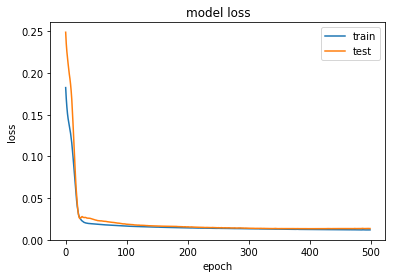

In [17]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

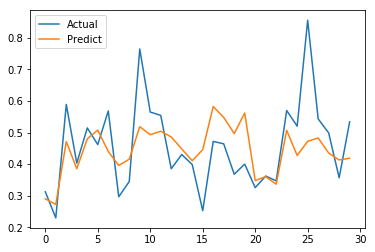

In [18]:
pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(pred.squeeze())
plt.legend(['Actual', 'Predict'], loc='best')
# plt.ylim(0.5,1)
plt.show()

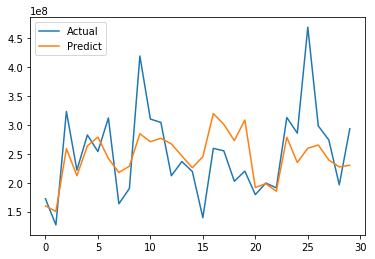

In [19]:
y_test_new = min_max_scalar.inverse_transform(y_test.reshape(-1,1))
pred_new = min_max_scalar.inverse_transform(pred.squeeze().reshape(-1,1))
plt.plot(y_test_new)
plt.plot(pred_new)
plt.ylim()
plt.legend(['Actual', 'Predict'], loc='best')
plt.show()